In [ ]:
!pip install Obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

Let's take a look at the training data for the lunar dataset. In addition to the data itself, we include a catalog that will tell you which events happen when in the data. The catalog includes the name of the file, the absolute time, the relative time in seconds (relative to the start of the file), the event ID (evid), and the type of moonquake. The types of moonquakes include impacts, deep moonquakes, and shallow moonquakes. You do not have to worry about predicting the type of moonquakes, that's just fun information for you to know!

**Note**: For your prediction, feel free to include either the absolute time or relative time, just make sure to mark it using the same header in the CSV file so we can easily score it!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
AKHIL_file = 'xa.s16.00.mhz.1972-09-10HR00_evid00075'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/test/data/S16_GradeA/'
mseed_file = f'{data_directory}{AKHIL_file}.mseed'
stAKHIL = read(mseed_file)
stAKHIL

1 Trace(s) in Stream:
XA.S16.00.MHZ | 1972-09-10T00:00:00.375000Z - 1972-09-10T23:01:39.242925Z | 6.6 Hz, 549206 samples

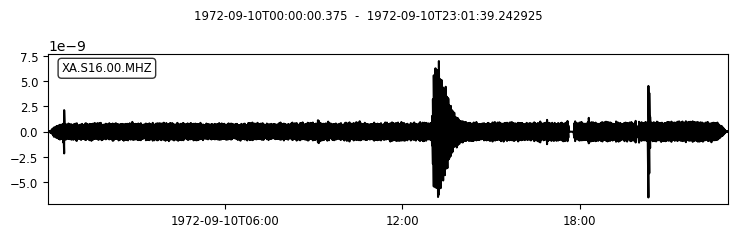

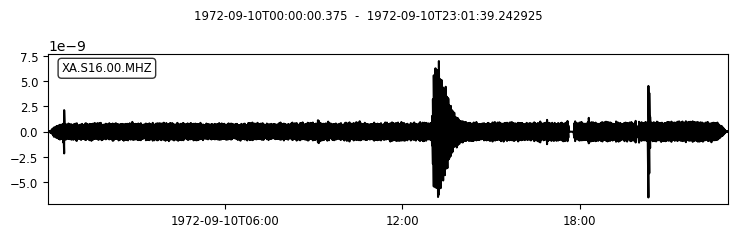

In [ ]:
stAKHIL.plot()

In [ ]:
import numpy as np
from obspy import read

# Load seismic data
st = read(mseed_file)
trace = st[0].data

In [ ]:


def calculate_aic(trace):
    n = len(trace)
    aic = np.zeros(n)
    for k in range(1, n-1):
        var1 = np.var(trace[:k])
        var2 = np.var(trace[k:])

        # Handle cases where var1 or var2 might be zero
        if var1 <= 0 or var2 <= 0:
            aic[k] = np.inf
        else:
            aic[k] = k * np.log(var1) + (n - k - 1) * np.log(var2)

    return aic

In [ ]:
def detect_p_wave(trace, window_size=100):
    # Calculate AIC
    aic = calculate_aic(trace)
    print("gh")
    # Find the minimum AIC value within a sliding window
    min_aic = np.inf
    p_arrival = 0
    for i in range(len(aic) - window_size):
        window = aic[i:i+window_size]
        min_val = np.min(window)
        if min_val < min_aic:
            min_aic = min_val
            p_arrival = i + np.argmin(window)

    return p_arrival

# Detect P-wave arrival
# p_arrival = detect_p_wave(trace)
# print(f"P-wave arrival detected at sample {p_arrival}")

In [ ]:
import matplotlib.pyplot as plt

def plot_results(trace, p_arrival):
    time = np.arange(len(trace))
    plt.figure(figsize=(12, 6))
    plt.plot(time, trace)
    plt.axvline(x=p_arrival, color='r', linestyle='--', label='P-wave arrival')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('Seismic Trace with P-wave Arrival')
    plt.legend()
    plt.show()

# plot_results(trace, p_arrival)

In [ ]:
file_name = 'xa.s12.00.mhz.1970-01-19HR00_evid00002'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/'
mseed_train_file = f'{data_directory}{file_name}.mseed'

# Load seismic data
st = read(mseed_train_file)
trace = st[0].data


In [ ]:
# Detect P-wave arrival
p_arrival_train = detect_p_wave(trace)
print(f"P-wave arrival detected at sample {p_arrival}")

gh
P-wave arrival detected at sample 310261


P-wave arrival detected at sample 486593


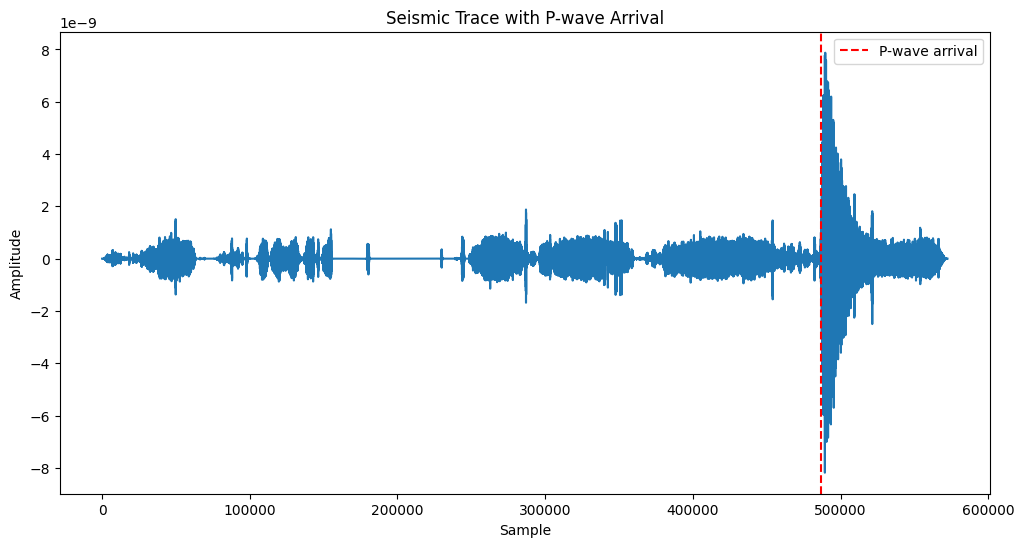

In [ ]:
print(f"P-wave arrival detected at sample {p_arrival_train}")
plot_results(trace, p_arrival_train)

In [ ]:
st[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-01-19T00:00:00.665000Z
         endtime: 1970-01-20T00:00:02.778208Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572415
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

In [ ]:
def calculate_aic_new(trace):
    n = len(trace)
    aic = np.zeros(n)
    idx = 0
    for k in range(1, n-1):
        if k%6!=0:
          aic[k] = np.inf
          continue
        var1 = np.var(trace[:k])
        var2 = np.var(trace[k:])

        # Handle cases where var1 or var2 might be zero
        if var1 <= 0 or var2 <= 0:
            aic[k] = np.inf
        else:
            aic[k] = k * np.log(var1) + (n - k - 1) * np.log(var2)

    return aic

In [ ]:
def detect_p_wave_new(trace, window_size=100):
    # Calculate AIC
    aic = calculate_aic_new(trace)
    print("gh")
    # Find the minimum AIC value within a sliding window
    #min_aic = np.min(aic)
    p_arrival = 0
    min_idx=np.argmin(aic)
    p_arrival = min_idx

    # for i in range(len(aic) - window_size):
    #     window = aic[i:i+window_size]
    #     min_val = np.min(window)
    #     if min_val < min_aic:
    #         min_aic = min_val
    #         p_arrival = i + np.argmin(window)

    return p_arrival

In [ ]:
p_arrival_train_2 = detect_p_wave_new(trace)
print(f"P-wave arrival detected at sample {p_arrival_train_2}")

gh
P-wave arrival detected at sample 486594


xa.s12.00.mhz.1970-01-19HR00_evid00002
gh
P-wave arrival detected at sample 73448.15094339622
Groundtruth :  73500
Error :  51.8490566037799


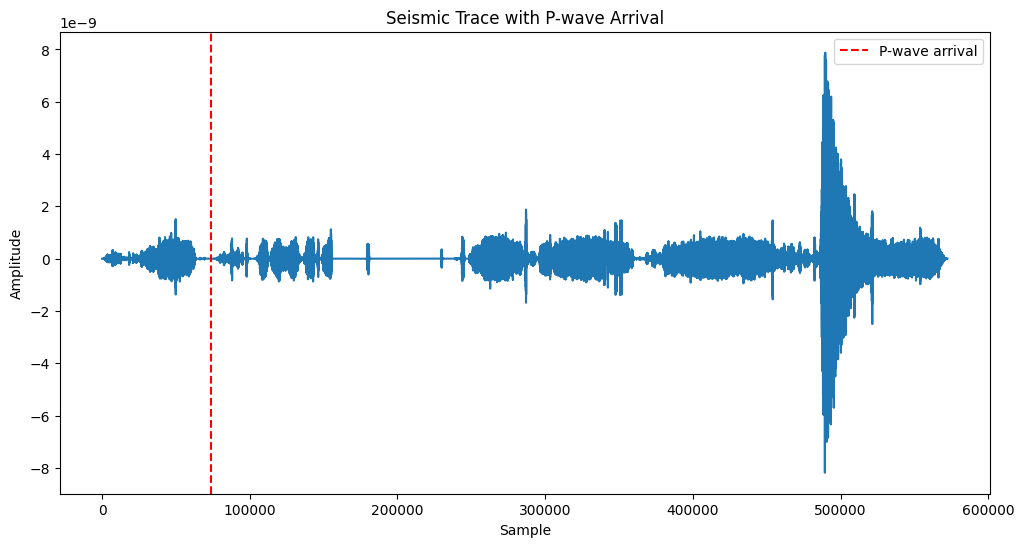

xa.s12.00.mhz.1970-03-25HR00_evid00003
gh
P-wave arrival detected at sample 12845.88679245283
Groundtruth :  12720
Error :  -125.88679245282947


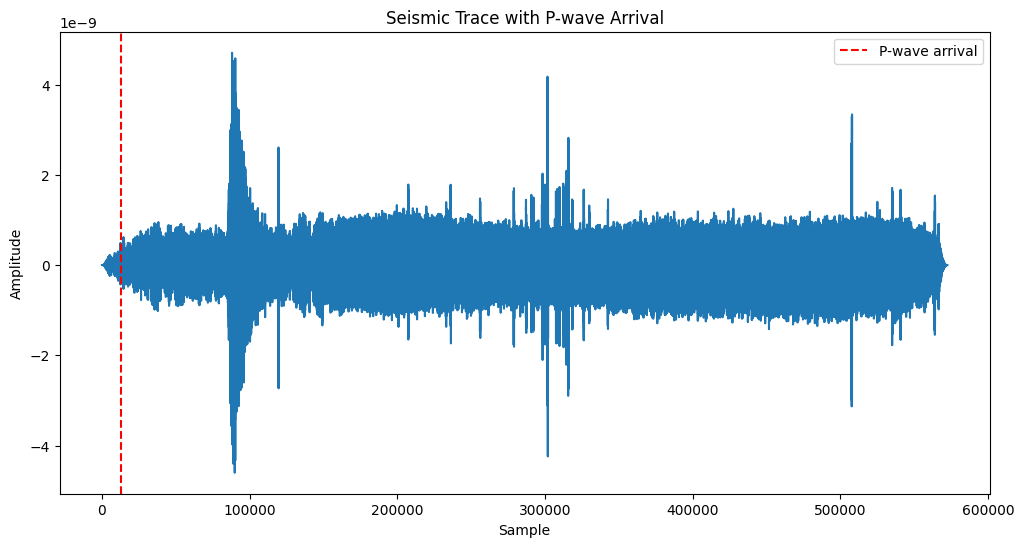

xa.s12.00.mhz.1970-03-26HR00_evid00004
gh
P-wave arrival detected at sample 73123.92452830188
Groundtruth :  73020
Error :  -103.92452830188267


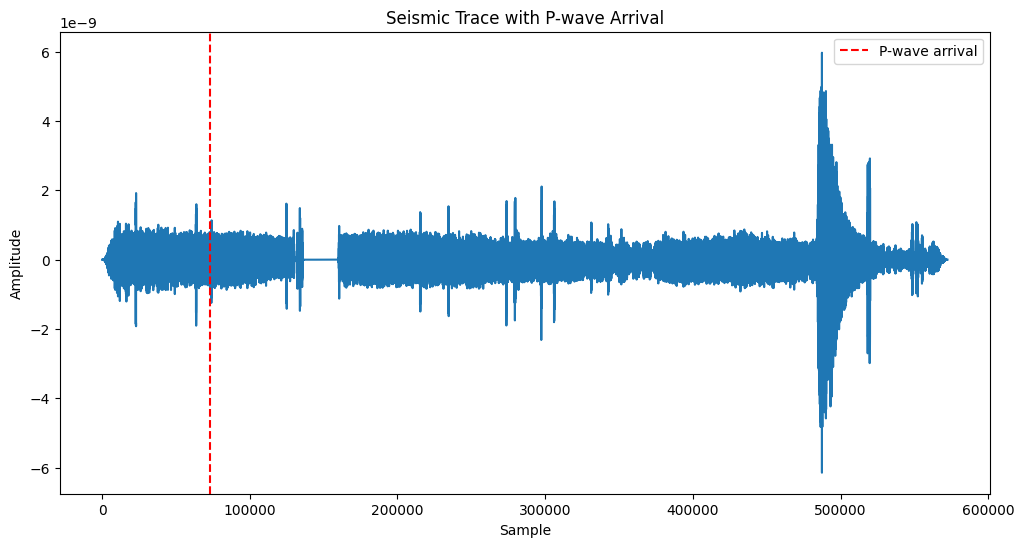

xa.s12.00.mhz.1970-04-25HR00_evid00006
gh
P-wave arrival detected at sample 8375.547169811322
Groundtruth :  4440
Error :  -3935.5471698113215


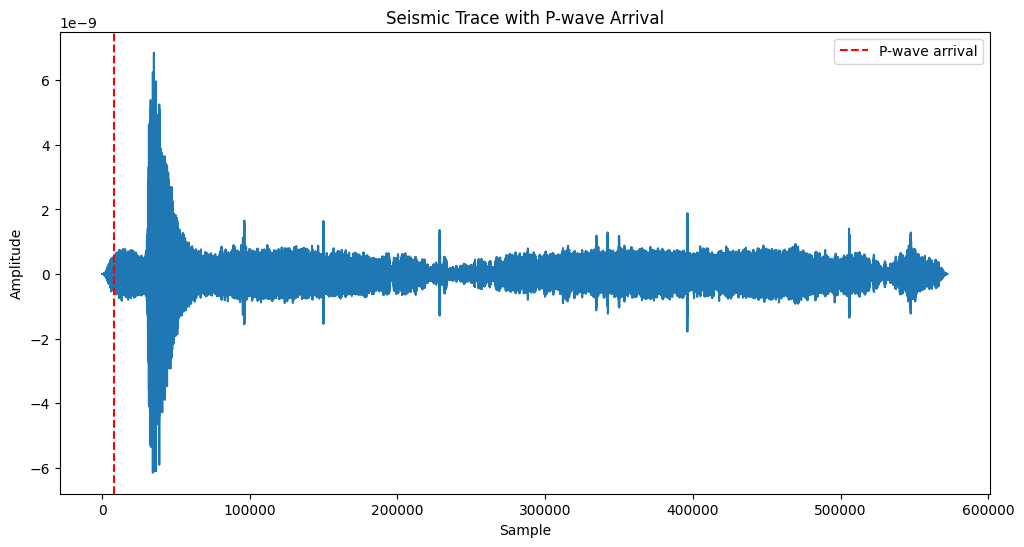

xa.s12.00.mhz.1970-04-26HR00_evid00007
gh
P-wave arrival detected at sample 49645.58490566038
Groundtruth :  52140
Error :  2494.4150943396235


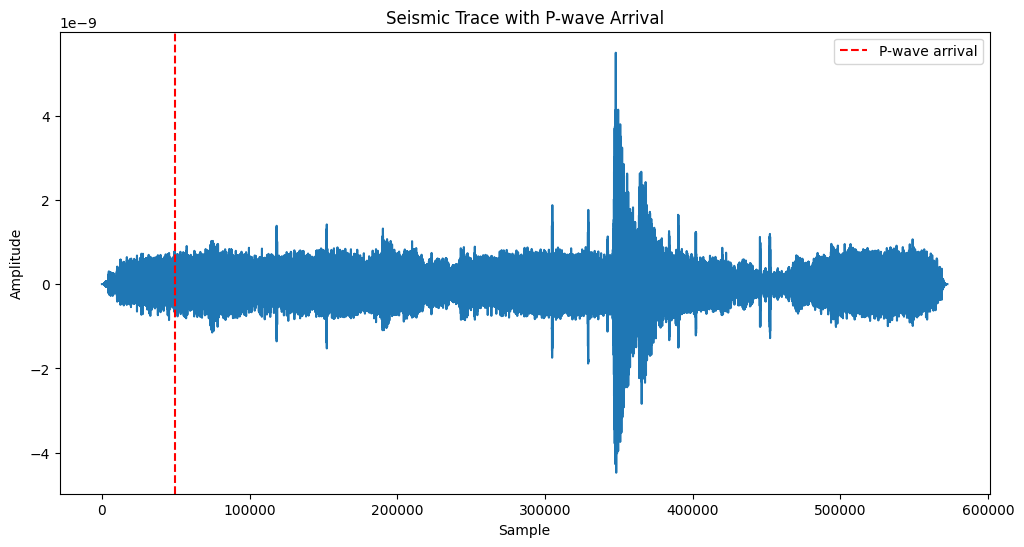

xa.s12.00.mhz.1970-06-15HR00_evid00008
gh
P-wave arrival detected at sample 68437.1320754717
Groundtruth :  68400
Error :  -37.13207547170168


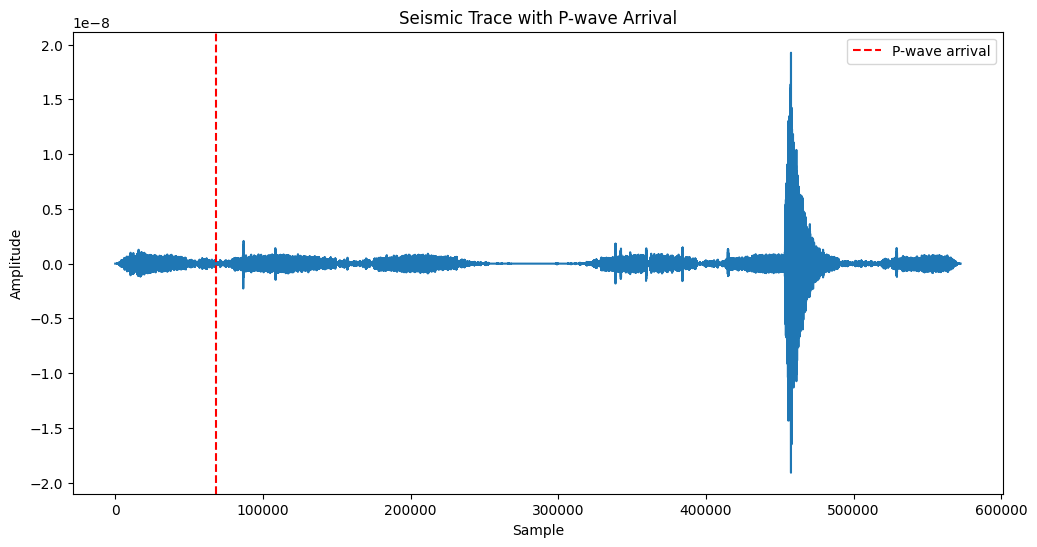

xa.s12.00.mhz.1970-06-26HR00_evid00009
gh
P-wave arrival detected at sample 72134.03773584905
Groundtruth :  72060
Error :  -74.03773584905139


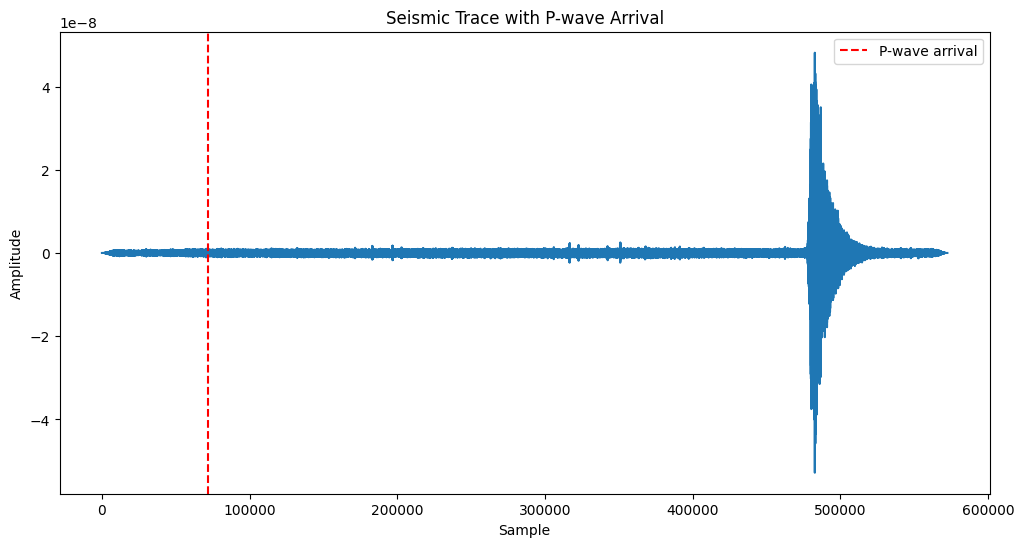

xa.s12.00.mhz.1970-07-20HR00_evid00010
gh
P-wave arrival detected at sample 45980.377358490565
Groundtruth :  18360
Error :  -27620.377358490565


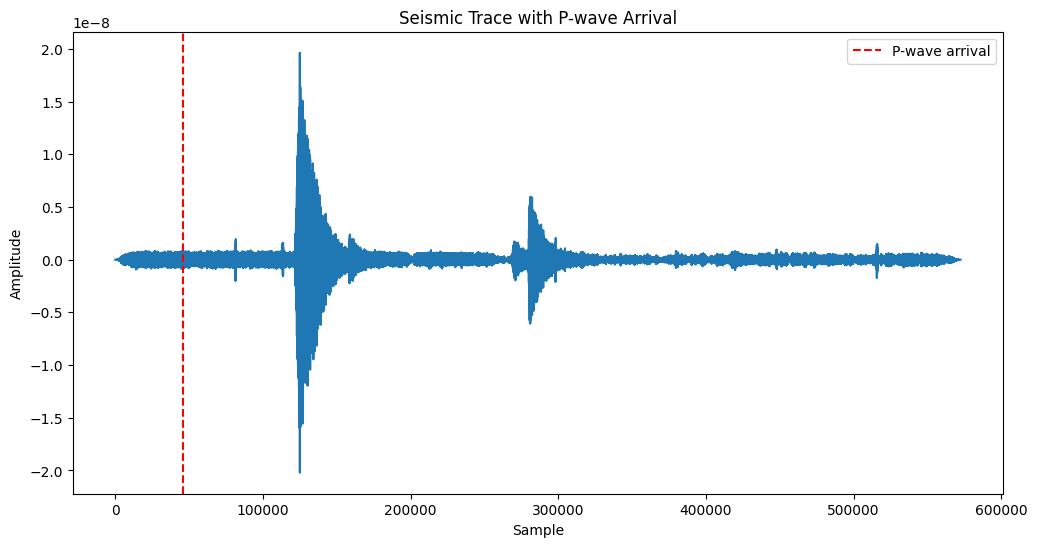

xa.s12.00.mhz.1970-07-20HR00_evid00011
gh
P-wave arrival detected at sample 45980.377358490565
Groundtruth :  42240
Error :  -3740.377358490565


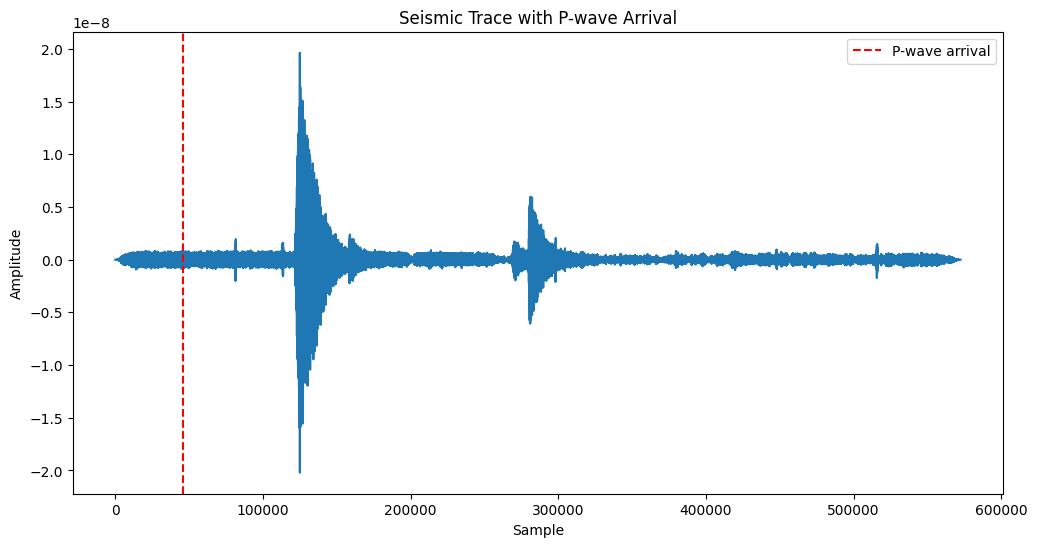

xa.s12.00.mhz.1970-09-26HR00_evid00013
gh
P-wave arrival detected at sample 71961.05660377358
Groundtruth :  71820
Error :  -141.05660377358436


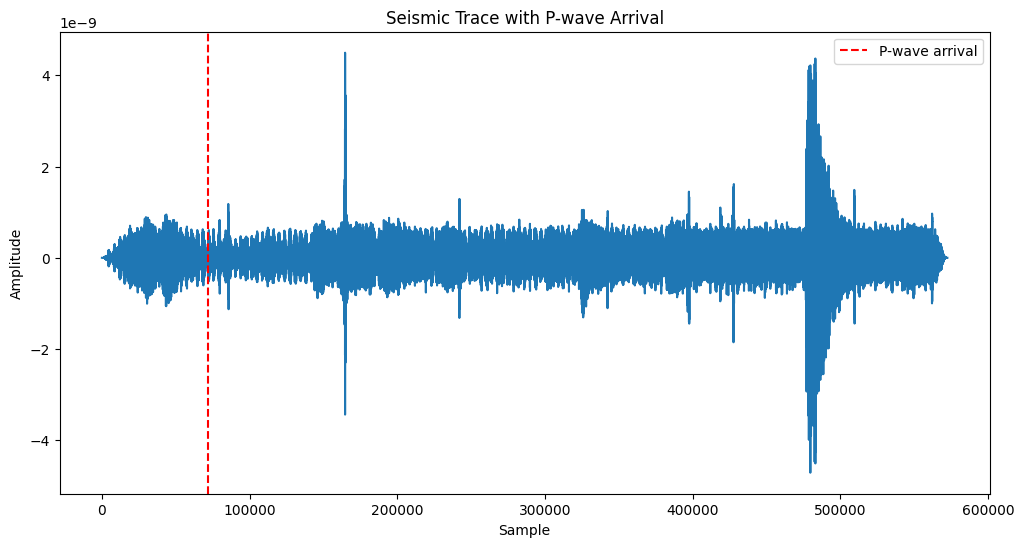

xa.s12.00.mhz.1970-10-24HR00_evid00014
gh
P-wave arrival detected at sample 34377.056603773584
Groundtruth :  41460
Error :  7082.943396226416


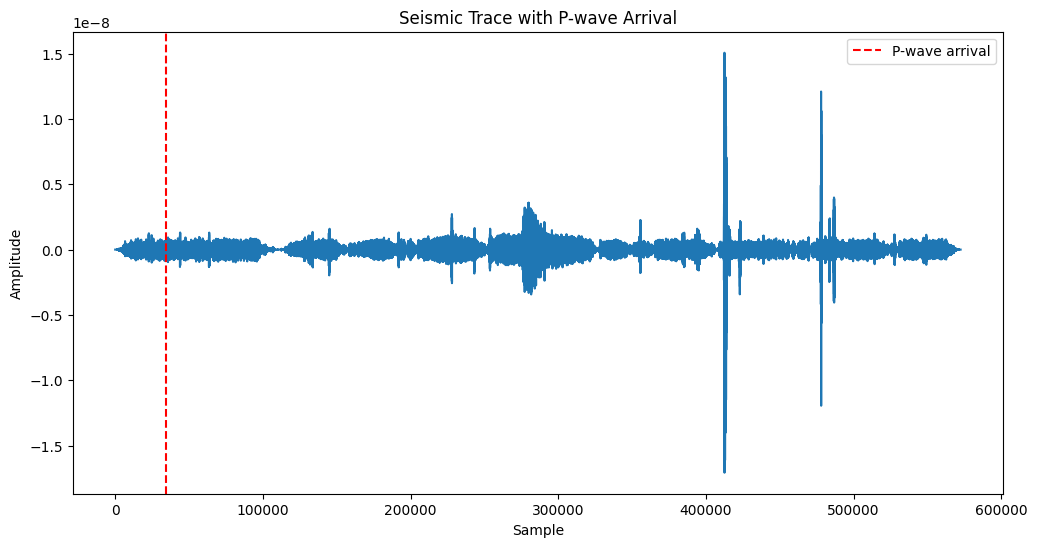

xa.s12.00.mhz.1970-11-12HR00_evid00015
gh
P-wave arrival detected at sample 62880.0
Groundtruth :  46200
Error :  -16680.0


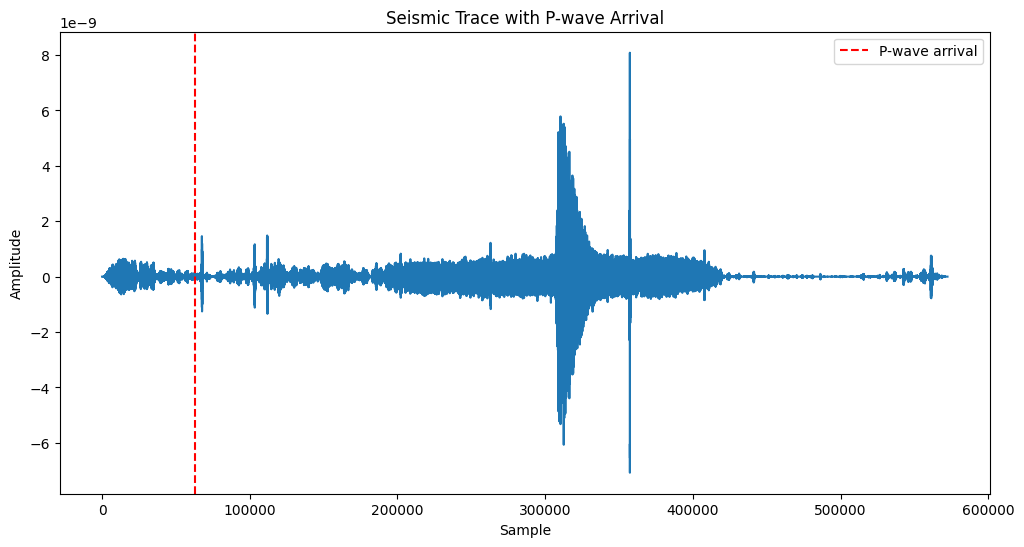

xa.s12.00.mhz.1970-12-11HR00_evid00017
gh
P-wave arrival detected at sample 30705.509433962263
Groundtruth :  26520
Error :  -4185.509433962263


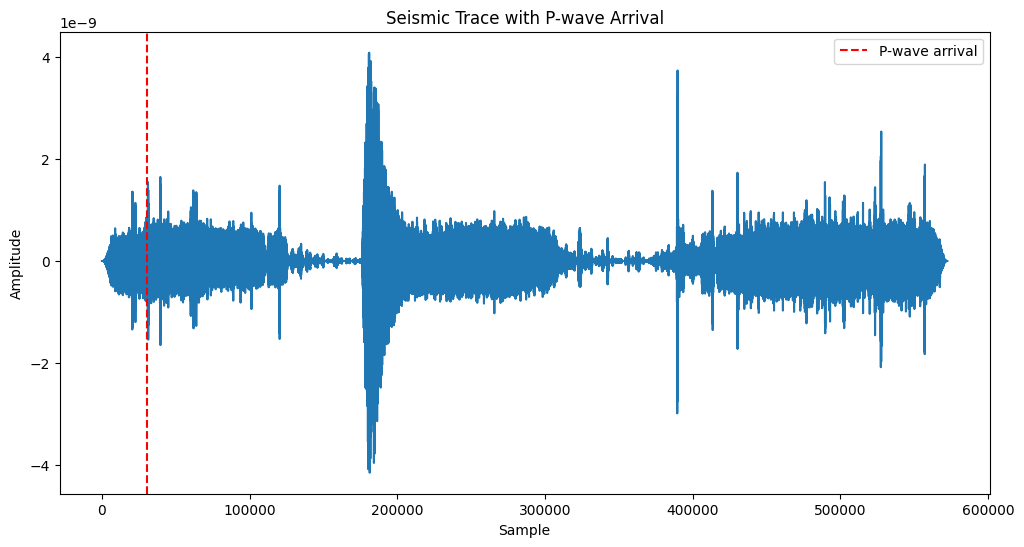

xa.s12.00.mhz.1970-12-27HR00_evid00019
gh
P-wave arrival detected at sample 74069.43396226416
Groundtruth :  74040
Error :  -29.433962264156435


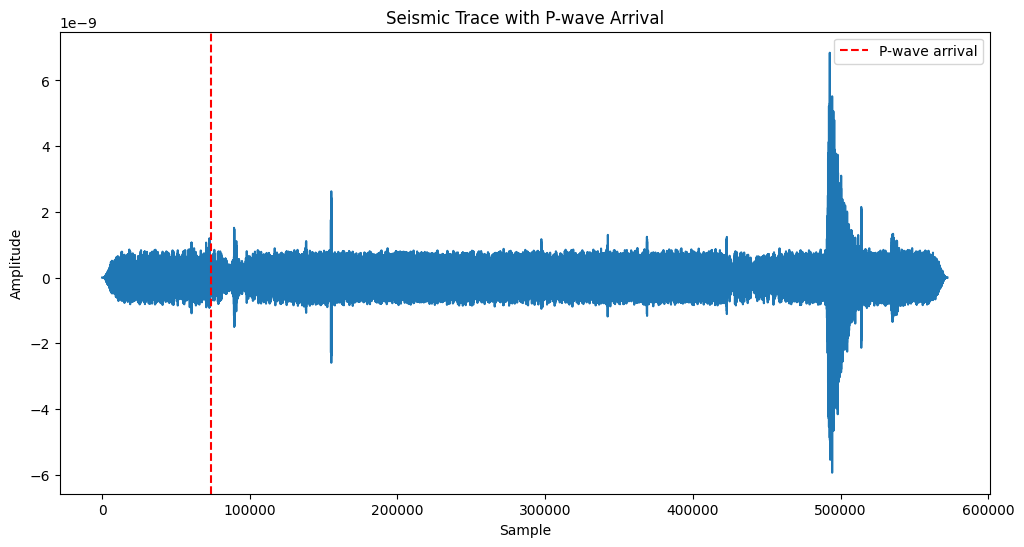

xa.s12.00.mhz.1970-12-31HR00_evid00021
gh
P-wave arrival detected at sample 55864.75471698113
Groundtruth :  56460
Error :  595.2452830188704


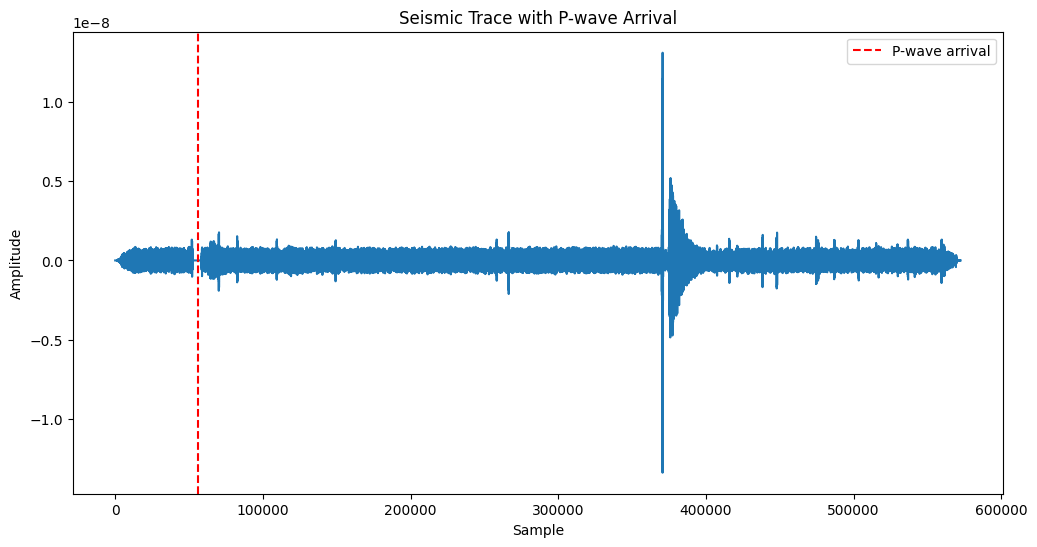

xa.s12.00.mhz.1971-01-15HR00_evid00022
gh
P-wave arrival detected at sample 51803.77358490566
Groundtruth :  45600
Error :  -6203.773584905663


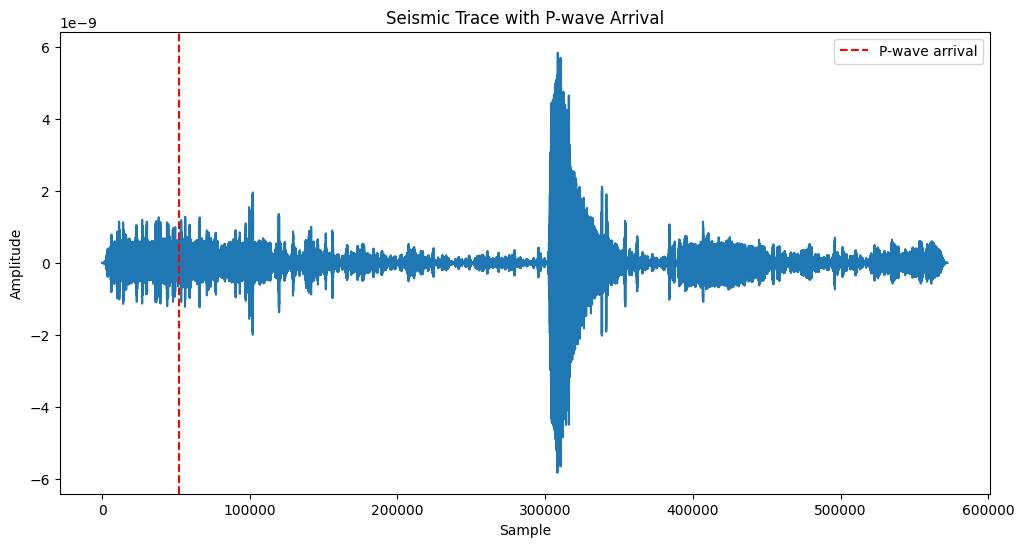

xa.s12.00.mhz.1971-01-28HR00_evid00023
gh
P-wave arrival detected at sample 43048.75471698113
Groundtruth :  53940
Error :  10891.24528301887


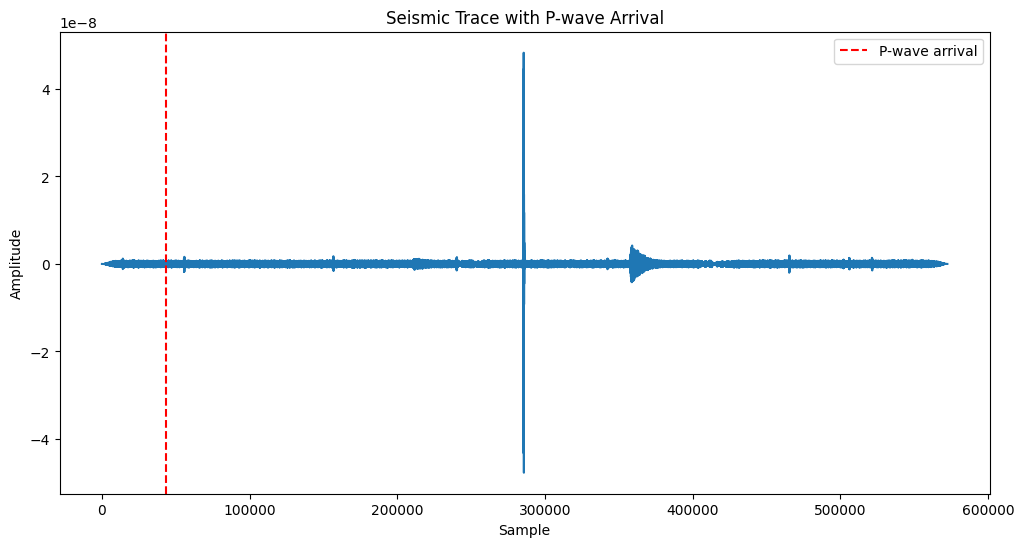

xa.s12.00.mhz.1971-01-29HR00_evid00024
gh
P-wave arrival detected at sample 55932.67924528302
Groundtruth :  66060
Error :  10127.32075471698


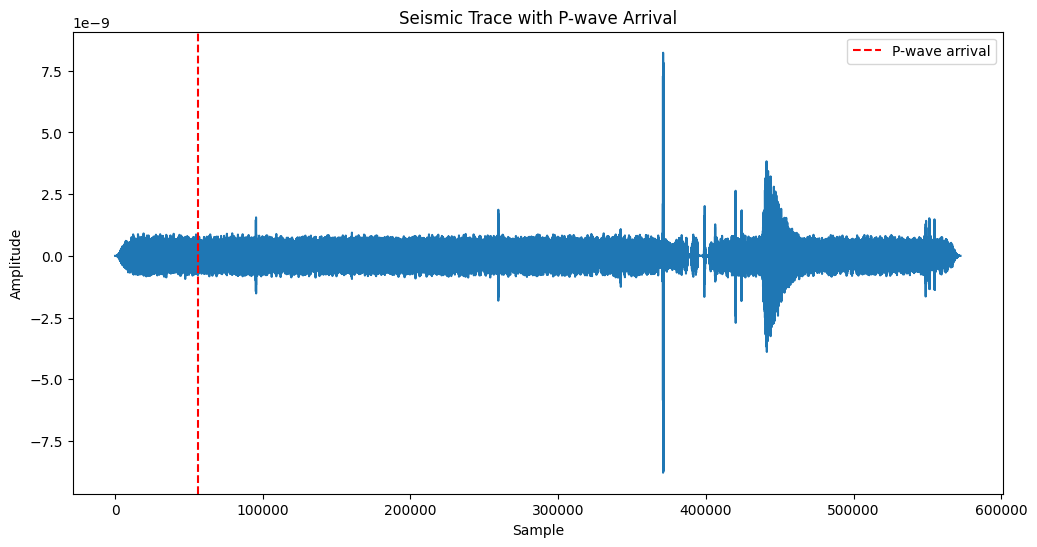

xa.s12.00.mhz.1971-02-09HR00_evid00026
gh
P-wave arrival detected at sample 30280.754716981133
Groundtruth :  13320
Error :  -16960.754716981133


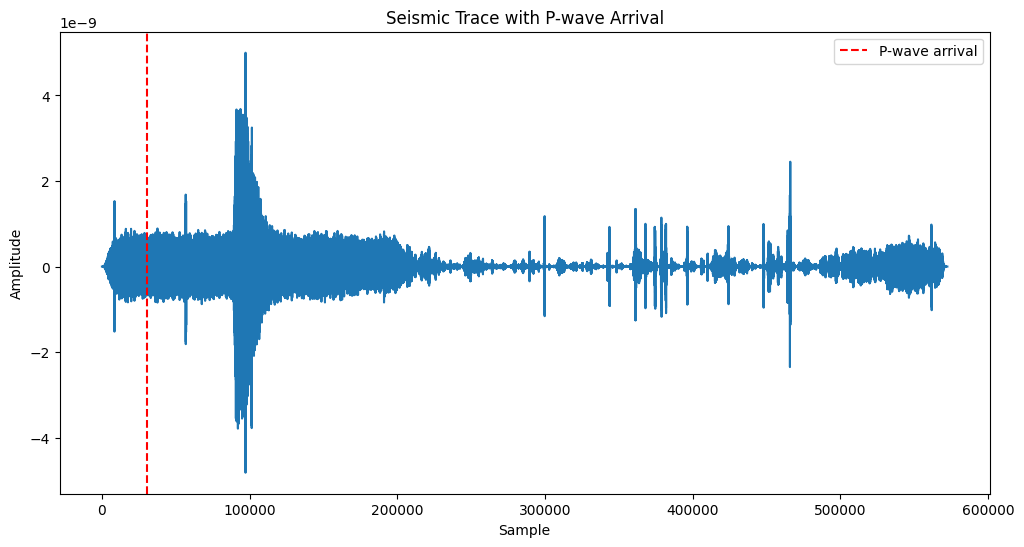

xa.s12.00.mhz.1971-03-25HR00_evid00028
gh
P-wave arrival detected at sample 51493.1320754717
Groundtruth :  55080
Error :  3586.8679245282983


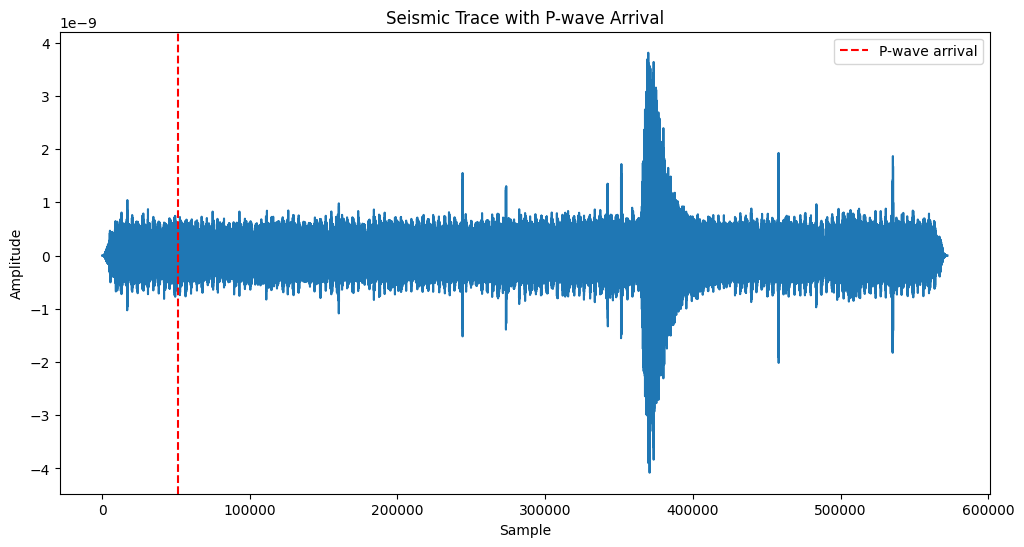

xa.s12.00.mhz.1971-04-13HR00_evid00029


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-04-13HR00_evid00029.mseed'

In [ ]:
cat_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/catalogs/'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
errors = []
for i in range(25):

  #file_name = 'xa.s12.00.mhz.1970-04-26HR00_evid00007'

  file_name = cat.iloc[i]['filename']
  print(file_name)

  mseed_train_file = f'{data_directory}{file_name}.mseed'

  # Load seismic data
  st = read(mseed_train_file)
  trace = st[0].data

  p_arrival_train_3 = detect_p_wave_new(trace)/6.625
  actual = int(cat.iloc[i]['time_rel(sec)'])
  print(f"P-wave arrival detected at sample {p_arrival_train_3}")
  print("Groundtruth : ",actual )
  error = actual - p_arrival_train_3
  errors.append(error)
  print("Error : ", error)
  plot_results(trace, p_arrival_train_3)



In [ ]:
print(errors)

[51.8490566037799, -125.88679245282947, -103.92452830188267, -3935.5471698113215, 2494.4150943396235, -37.13207547170168, -74.03773584905139, -27620.377358490565, -3740.377358490565, -141.05660377358436, 7082.943396226416, -16680.0, -4185.509433962263, -29.433962264156435, 595.2452830188704]


In [ ]:
print

In [ ]:

print(np.abs(np.mean(errors)))

3096.588679245282


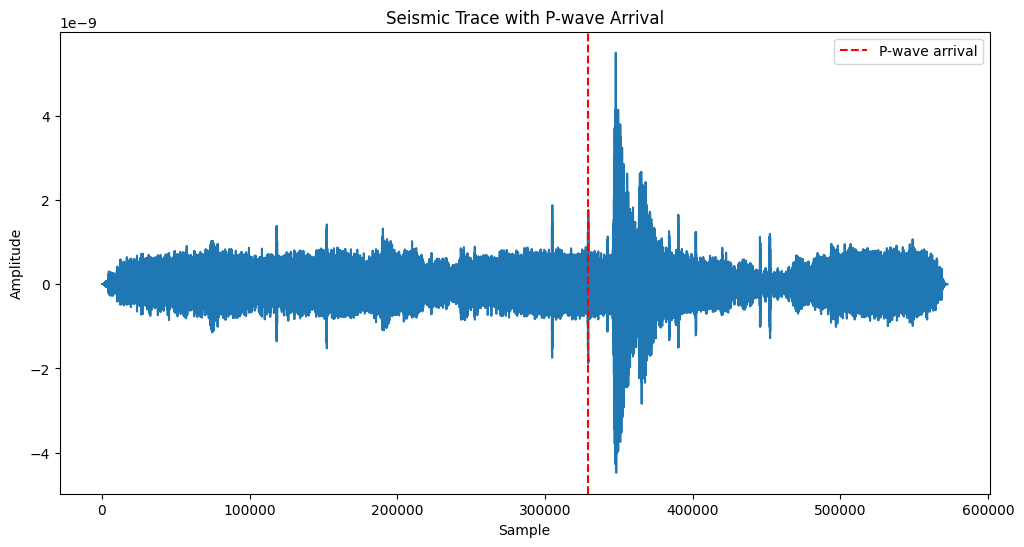

In [ ]:
plot_results(trace, p_arrival_train_3)

xa.s12.00.mhz.1970-07-20HR00_evid00010
gh
P-wave arrival detected at sample 46050.11320754717
Groundtruth :  18360
Error :  -27690.11320754717


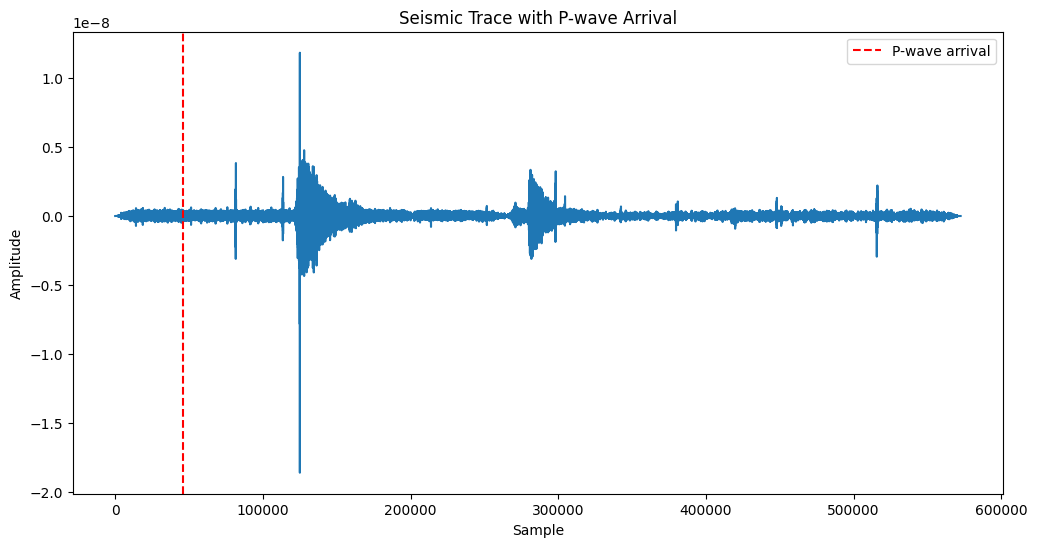

xa.s12.00.mhz.1970-11-12HR00_evid00015
gh
P-wave arrival detected at sample 62064.90566037736
Groundtruth :  46200
Error :  -15864.905660377357


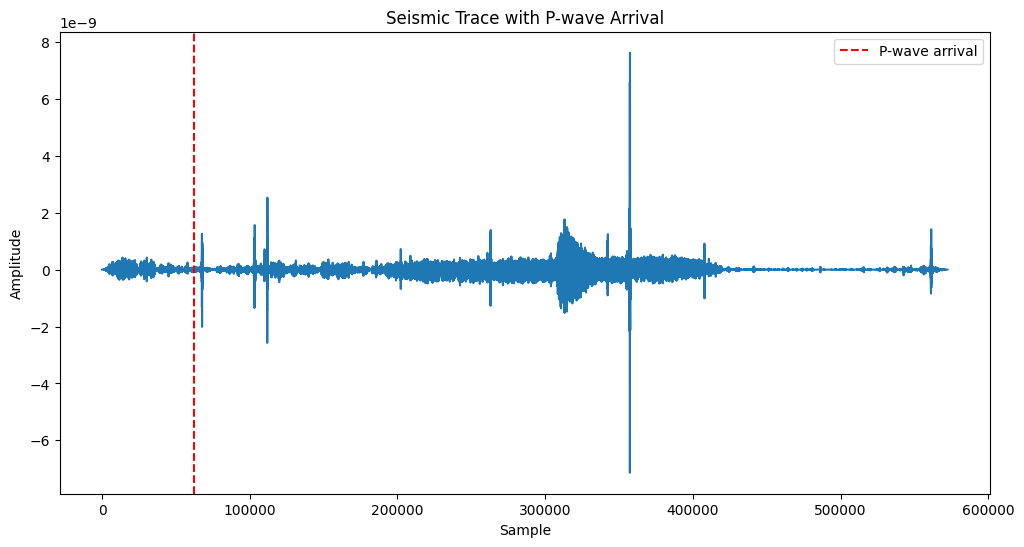

In [ ]:
# # Set the minimum frequency
minfreq = 0.01
maxfreq = 0.5

# # Going to create a separate trace for the filter data
# st_filt = st.copy()
# st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
# tr_filt = st_filt.traces[0].copy()
# tr_times_filt = tr_filt.times()
# tr_data_filt = tr_filt.data

cat_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/catalogs/'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
errors = []
for i in [7,11]:

  #file_name = 'xa.s12.00.mhz.1970-04-26HR00_evid00007'

  file_name = cat.iloc[i]['filename']
  print(file_name)

  mseed_train_file = f'{data_directory}{file_name}.mseed'

  # Load seismic data
  st = read(mseed_train_file)
  st.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
  trace = st.traces[0].data

  p_arrival_train_3 = detect_p_wave_new(trace)/6.625
  actual = int(cat.iloc[i]['time_rel(sec)'])
  print(f"P-wave arrival detected at sample {p_arrival_train_3}")
  print("Groundtruth : ",actual )
  error = actual - p_arrival_train_3
  errors.append(error)
  print("Error : ", error)
  plot_results(trace, p_arrival_train_3)



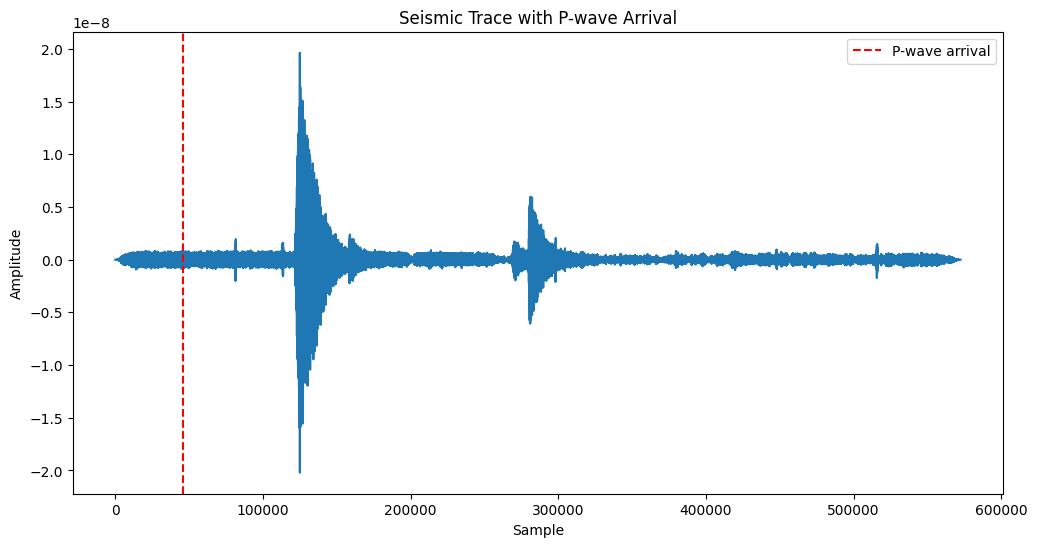

In [ ]:
plot_results(trace, p_arrival_train_3)

Selecting max of the 6 values in the window

In [ ]:
for k in range(1, 66, 6):
  print(k)

1
7
13
19
25
31
37
43
49
55
61


In [ ]:
def calculate_aic_new2(trace):
    n = len(trace)
    # aic = np.full(n, np.inf)
    aic = np.zeros(n)
    idx = 0
    for idx in range(1, n-1):
        k = idx
        # np.argmax(trace[idx:idx+6])+idx
        var1 = np.var(trace[:k])
        var2 = np.var(trace[k:])

        # Handle cases where var1 or var2 might be zero
        if var1 <= 0 or var2 <= 0:
            aic[k] = np.inf
        else:
            aic[k] = k * np.log(var1) + (n - k - 1) * np.log(var2)

    return aic

In [ ]:
def detect_p_wave_new2(trace, window_size=100):
    # Calculate AIC
    aic = calculate_aic_new2(trace)
    print("gh")
    # Find the minimum AIC value within a sliding window
    #min_aic = np.min(aic)
    p_arrival = 0
    min_idx=np.argmin(aic)
    p_arrival = min_idx

    # for i in range(len(aic) - window_size):
    #     window = aic[i:i+window_size]
    #     min_val = np.min(window)
    #     if min_val < min_aic:
    #         min_aic = min_val
    #         p_arrival = i + np.argmin(window)

    return p_arrival

xa.s12.00.mhz.1970-07-20HR00_evid00010
gh
P-wave arrival detected at sample 45980.377358490565
Groundtruth :  18360
Error :  -27620.377358490565


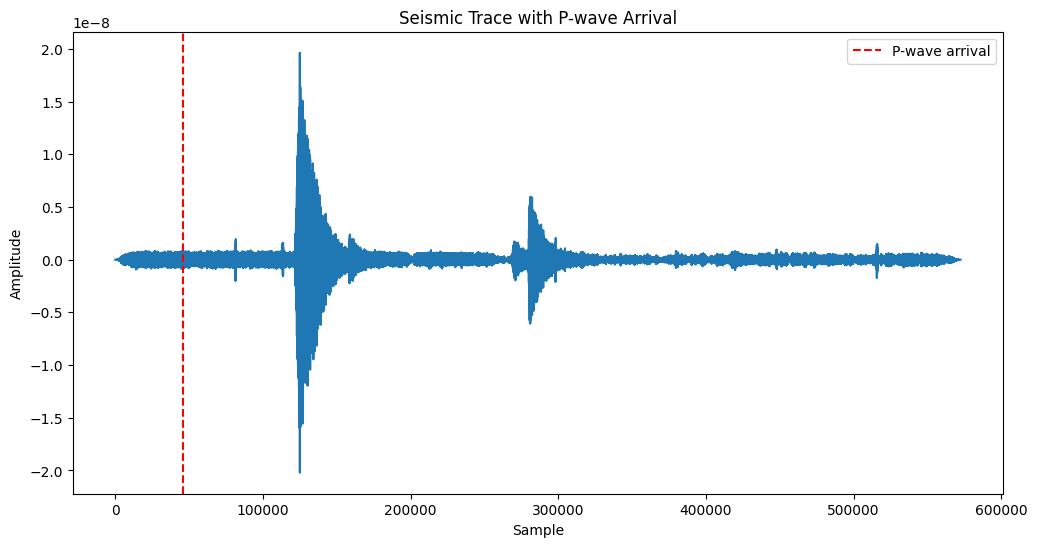

xa.s12.00.mhz.1970-11-12HR00_evid00015


KeyboardInterrupt: 

In [ ]:
# # Set the minimum frequency
minfreq = 0.01
maxfreq = 0.5

# # Going to create a separate trace for the filter data
# st_filt = st.copy()
# st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
# tr_filt = st_filt.traces[0].copy()
# tr_times_filt = tr_filt.times()
# tr_data_filt = tr_filt.data

cat_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/catalogs/'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
errors = []
for i in [7,11]:

  #file_name = 'xa.s12.00.mhz.1970-04-26HR00_evid00007'

  file_name = cat.iloc[i]['filename']
  print(file_name)

  mseed_train_file = f'{data_directory}{file_name}.mseed'

  # Load seismic data
  st = read(mseed_train_file)
  #st.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
  trace = st.traces[0].data

  p_arrival_train_3 = detect_p_wave(trace)/6.625
  actual = int(cat.iloc[i]['time_rel(sec)'])
  print(f"P-wave arrival detected at sample {p_arrival_train_3}")
  print("Groundtruth : ",actual )
  error = actual - p_arrival_train_3
  errors.append(error)
  print("Error : ", error)
  plot_results(trace, p_arrival_train_3)



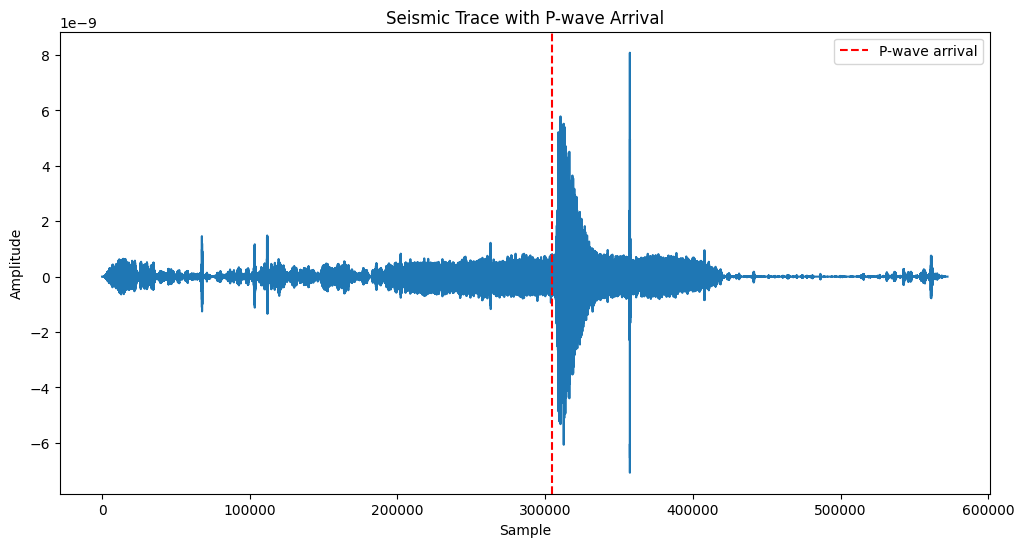

In [ ]:
plot_results(trace, p_arrival_train_3*6.625)

In [ ]:
##### From Here #########
print("WE START HERE AGAIN")

WE START HERE AGAIN


In [ ]:
def find_peaks(data, threshold, min_distance):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i-1] > data[i] < data[i+1] and data[i] < threshold:
            peaks.append(i)

    # Apply minimum distance criterion
    filtered_peaks = [peaks[0]]
    for peak in peaks[1:]:
        if peak - filtered_peaks[-1] >= min_distance:
            filtered_peaks.append(peak)

    return filtered_peaks

# Parameters to adjust


In [ ]:
from obspy.signal.trigger import aic_simple
def detect_pwave_obspyaic(trace, window_size=100):
    # Calculate AIC
    aic = aic_simple(trace.data)
    print("gh")
    aic_threshold = np.mean(aic) - 2 * np.std(aic)
    min_distance_samples = int(0.5 * trace.stats.sampling_rate)  # 0.5 seconds minimum between picks

    potential_picks = find_peaks(aic, aic_threshold, min_distance_samples)
    correction_samples = int(0.02 * trace.stats.sampling_rate)  # e.g., 20 ms correction
    final_picks = [max(0, pick - correction_samples) for pick in potential_picks]
    # min_idx=np.argmin(aic)

    return final_picks

In [ ]:
from obspy.signal.trigger import ar_pick
def detect_pwave_obspyaic_sta(trace, window_size=100):

    # Define parameters
    samp_rate = trace.stats.sampling_rate
    f1 = 1.0  # Frequency of the lower bandpass window
    f2 = 20.0  # Frequency of the upper bandpass window
    lta_p = 1.0  # Length of LTA for P arrival in seconds
    sta_p = 0.1  # Length of STA for P arrival in seconds
    lta_s = 4.0  # Length of LTA for S arrival in seconds
    sta_s = 1.0  # Length of STA for S arrival in seconds
    m_p = 2  # Number of AR coefficients for P arrival
    m_s = 8  # Number of AR coefficients for S arrival
    l_p = 0.1  # Length of variance window for P arrival in seconds
    l_s = 0.2  # Length of variance window for S arrival in seconds

    # Apply ar_pick
    p_pick, s_pick = ar_pick(trace.data, trace.data, trace.data,
                            samp_rate, f1, f2, lta_p, sta_p, lta_s, sta_s,
                            m_p, m_s, l_p, l_s, s_pick=True)
    return p_pick


In [ ]:
# read from dir

cat_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/catalogs/'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

errors = []
for i in [3,4]:

  #file_name = 'xa.s12.00.mhz.1970-04-26HR00_evid00007'

  file_name = cat.iloc[i]['filename']
  print(file_name)

  mseed_train_file = f'{data_directory}{file_name}.mseed'

  # Load seismic data
  st = read(mseed_train_file)
  #st.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
  trace = st[0]
  # trace.detrend('linear')
  # trace.filter('bandpass', freqmin=0.1, freqmax=0.5)



  p_arrival_train_3 = detect_pwave_obspyaic(trace)
  min_diff = np.inf

  actual = int(cat.iloc[i]['time_rel(sec)'])

  print("Groundtruth : ",actual*6.625 )
  print(p_arrival_train_3)

#   for i in p_arrival_train_3:
#     error = abs(actual*6.625 - p_arrival_train_3[i])
#     if min_diff > error:
#       min_diff = p_arrival_train_3[i]
#   print(f"P-wave arrival detected at sample {min_diff}")
#   error = actual*6.625 - p_arrival_train_3[i]
#   errors.append(error)
#   print("Error : ", error)
#   plot_results(trace, p_arrival_train_3)
# print("AVERAGE ERROR - ",np.average(errors))

xa.s12.00.mhz.1970-04-25HR00_evid00006
gh
Groundtruth :  29415.0
[49056, 49063, 49068, 49072, 49077, 49082, 49086, 49096, 49105, 49109, 49114, 49120, 49124, 49128, 49131, 49135, 49140, 49144, 49148, 49152, 49162, 49169, 49173, 49177, 49182, 49186, 49191, 49197, 49215, 49224, 49228, 49233, 49238, 49247, 49255, 49259, 49263, 49266, 49270, 49274, 49278, 49281, 49286, 49299, 49304, 49308, 49317, 49321, 49331, 49335, 49345, 49349, 49352, 49355, 49360, 49365, 49369, 49373, 49377, 49384, 49388, 49394, 49398, 49410, 49419, 49426, 49430, 49451, 49456, 49459, 49462, 49468, 49475, 49478, 49482, 49486, 49493, 49497, 49524, 49528, 49536, 49540, 49544, 49548, 49553, 49562, 49566, 49569, 49573, 49577, 49585, 49590, 49594, 49597, 49603, 49607, 49611, 49615, 49619, 49623, 49628, 49632, 49636, 49645, 49649, 49654, 49658, 49671, 49675, 49684, 49687, 49691, 49696, 49699, 49707, 49710, 49718, 49728, 49732, 49736, 49740, 49746, 49752, 49755, 49758, 49762, 49768, 49773, 49777, 49782, 49786, 49790, 49794, 497

In [ ]:
import numpy as np
from obspy import Trace

def calculate_maic(trace: Trace, window_length: int = None) -> np.ndarray:
    """
    Calculate Modified Akaike Information Criterion (mAIC) for a given trace.

    Parameters:
    trace (obspy.Trace): Input seismic trace
    window_length (int): Length of the sliding window in samples.
                         If None, it defaults to 10% of the trace length.

    Returns:
    np.ndarray: Array of mAIC values
    """
    # Extract data from trace
    data = trace.data

    # Set default window length if not provided
    if window_length is None:
        window_length = int(0.1 * len(data))

    # Ensure window length is at least 3 samples
    window_length = max(window_length, 3)

    # Initialize mAIC array
    maic = np.zeros(len(data))

    # Calculate mAIC for each point
    for i in range(len(data)):
        # Define window start and end
        start = max(0, i - window_length // 2)
        end = min(len(data), i + window_length // 2)
        window = data[start:end]

        # Calculate AIC for all possible divisions of the window
        k = np.arange(1, len(window))
        var1 = np.array([np.var(window[:j]) for j in k])
        var2 = np.array([np.var(window[j:]) for j in k])

        # Handle zero variance cases
        var1[var1 == 0] = np.finfo(float).eps
        var2[var2 == 0] = np.finfo(float).eps

        aic = (k * np.log(var1) + (len(window) - k - 1) * np.log(var2))

        # Store the minimum AIC value for this window
        maic[i] = np.min(aic)

    return maic

In [ ]:
from obspy import read

cat_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/catalogs/'
data_directory = '/content/drive/MyDrive/data_nasa_seismic/data/lunar/training/data/S12_GradeA/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

errors = []
for i in [3,4]:
# Read your MiniSEED file
    file_name = cat.iloc[i]['filename']
    print(file_name)

    mseed_train_file = f'{data_directory}{file_name}.mseed'

    # Load seismic data
    st = read(mseed_train_file)
    tr = st[0]

    # Calculate mAIC
    maic_values = calculate_maic(tr)

    # Visualize the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))

    # Plot the seismogram
    plt.subplot(2, 1, 1)
    plt.plot(tr.times(), tr.data, 'k')
    plt.title('Seismogram')
    plt.ylabel('Amplitude')

    # Plot the mAIC function
    plt.subplot(2, 1, 2)
    plt.plot(tr.times(), maic_values, 'b')
    plt.title('Modified AIC Function')
    plt.xlabel('Time (s)')
    plt.ylabel('mAIC Value')

    plt.tight_layout()
    plt.show()

xa.s12.00.mhz.1970-04-25HR00_evid00006


KeyboardInterrupt: 

In [ ]:
components = set(trace.stats.channel[-1] for trace in st)
num_components = len(components)

print(f"Number of components: {num_components}")
print(f"Components: {', '.join(components)}")

Number of components: 1
Components: Z
